# 第一讲 OpenCV操作基础


## 1. 图像的读取与展示
- 利用`cv2.imread()`函数，分别以 RGB 和灰度两种色彩模式读入图像

- 利用`type()`函数查看图像数据的类型
- 利用`shape`属性获取图像的形状，返回值是一个包含行数、列数、通道数的元组
- 利用`dtype`属性获取图像元素的数据类型

- 利用`cv2.cvtColor()`函数将彩色图像转为灰度图
- 利用`cv2.imshow()`函数展示图像
- 利用`cv2.imwrite`保存图片
- 利用`matplotlib.pyplot.imshow()`函数分别展示RGB和灰度图像。

In [1]:
# 传统视觉常用起手式
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import clear_output


In [3]:
tsubaki = cv2.imread('res/tsubaki.png')
kita = cv2.imread('res/kita.png')
lena = cv2.imread('res/lena.png', cv2.IMREAD_GRAYSCALE)

In [4]:
# 可以使用Python中的type函数查看对象的类型，证明Python中的OpenCV，使用numpy的ndarray存储图像
print(type(lena), type(kita))
# numpy的ndarray本质上是张量（Tensor），提供一个shape属性，告诉我们图像的尺寸（row, column, channel）。
print(lena.shape, kita.shape)
# numpy的ndarray提供一个dtype属性，告诉我们像素是以何种数据类型被存储的
print(lena.dtype, kita.dtype)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(512, 512) (508, 394, 3)
uint8 uint8


In [5]:
cv2.imshow('kita', kita)
cv2.waitKey(0)
# 如果有同学用pycharm的话此处的效果可能会不一样

-1

In [6]:
while True:
    cv2.imshow('lena', lena)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

In [7]:
kita_grey = cv2.cvtColor(kita, cv2.COLOR_BGR2GRAY)
# 同时也有cv2.COLOR_GRAY2BGR参数进行逆转换，其转换方法为R = G = B = Y
#cv2.imshow('kita_grey', kita_grey)
#cv2.waitKey(0)

In [8]:
cv2.imwrite('kita_grey.png', kita_grey)

True

In [9]:
# 设置图像大小
plt.rcParams['figure.figsize'] = (12, 8)

def show_img(*imgs: np.ndarray) -> None:
    """使用matplotlib在Notebook中绘制图像"""
    plt.figure()
    for idx, img in enumerate(imgs):
        plt.subplot(1, len(imgs), idx + 1)
        if len(img.shape) == 2:
            # 灰度图
            plt.imshow(img, cmap='gray')
        elif len(img.shape) == 3:
            # 彩色图在绘制时需要将OpenCV的BGR格式转为RGB格式
            plt.imshow(img[:, :, ::-1]) # 对[:, :, ::-1]有疑惑的同学可以研究一下Python的切片

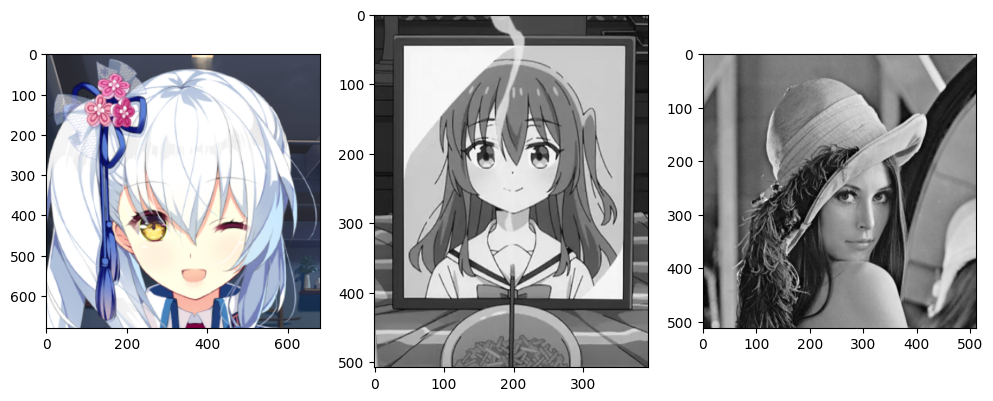

In [10]:
show_img(tsubaki, kita_grey, lena)

## 2. RGB与HSV颜色空间

许多情况下，在单一色彩空间中进行二值化等操作并不能有效的分割出我们的目标。（比如今年赛场上R2对内部球的识别需要直面死亡聚光灯）

因此，同学们要熟练掌握两种颜色空间的各个参数含义,并且灵活运用它们处理图像达到目标效果（本节课的作业尤其需要这一点）

### 2.1 RGB颜色空间
默认情况下，OpenCV中读取的图像采用RGB色彩模型，**每个像素以（B, G, R）的顺序排列**，全255白，全0黑。

通常在需要对三个通道分别操作时，我们使用`cv2.split()`将彩色图像拆分为B、G、R三个通道

![RGB色彩空间](res/rgb.png)

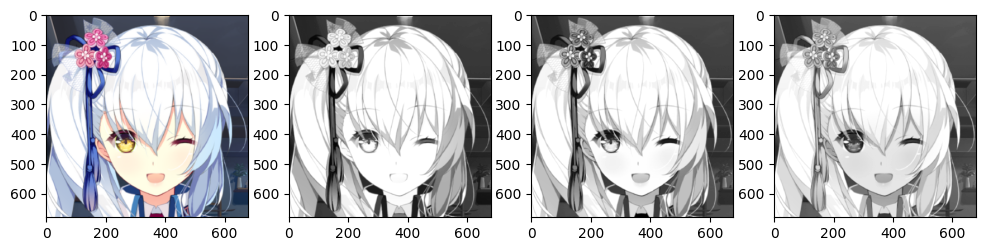

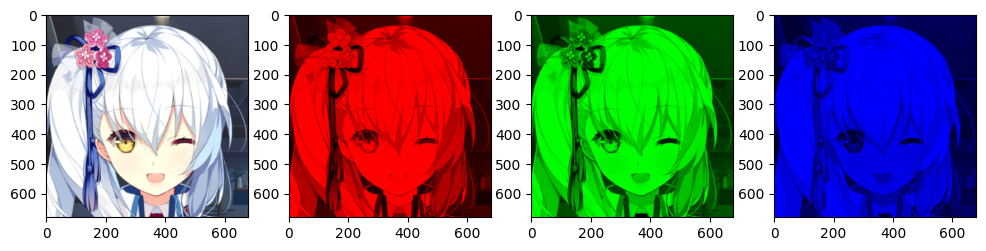

In [11]:
b, g, r = cv2.split(tsubaki)

# 以灰度图的形式展示的RGB通道图像
show_img(tsubaki, r, g, b)

# 加强可视化效果，给三个色彩空间上色
tsubaki_r, tsubaki_g, tsubaki_b = np.zeros_like(tsubaki), np.zeros_like(tsubaki), np.zeros_like(tsubaki)
tsubaki_b[:, :, 0] = b
tsubaki_g[:, :, 1] = g
tsubaki_r[:, :, 2] = r
show_img(tsubaki, tsubaki_r, tsubaki_g, tsubaki_b)

### 2.2 HSV颜色空间

- 色相：在不同波长的光照射下，人眼所感觉不同的颜色；
- 饱和度：饱和度越高，色彩越纯越鲜艳，饱和度越低，色彩则逐渐变灰；
- 亮度：颜色的明亮程度。

**要特别注意的是，OpenCV中HSV三通道的范围做了二次处理，分别是H: 0-255, S: 0-255, V: 0-255**

<img src="res/HSV.png" width=70%/>

(680, 680, 3)


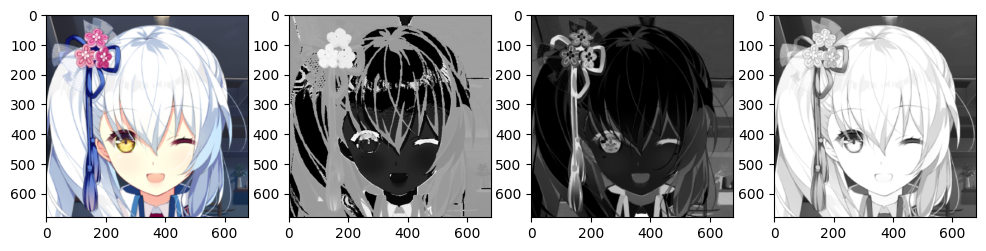

In [12]:
tsubaki_hsv = cv2.cvtColor(tsubaki, cv2.COLOR_BGR2HSV_FULL)
h, s, v = cv2.split(tsubaki_hsv)
print(tsubaki_hsv.shape)
show_img(tsubaki, h, s, v)

## 3. 二值化
十分甚至九分重要的图像处理方法，二值化方法与阈值的选取常常会直接影响到最终的结果。

图像二值化是进行图像分割过程中的常用手段，该操作将一个单通道图像的值，映射至两种不同的取值（通常是0和255）。

<img src="res/threshold.png" height=600/>
<img src="res/threshold_eq.png" height=600/>

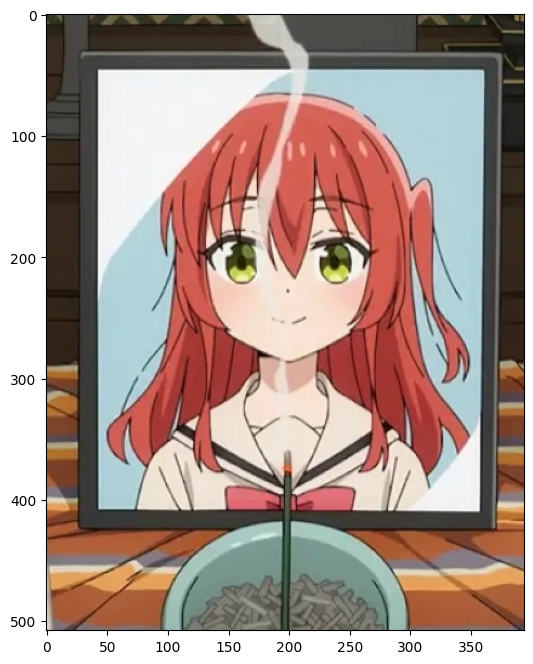

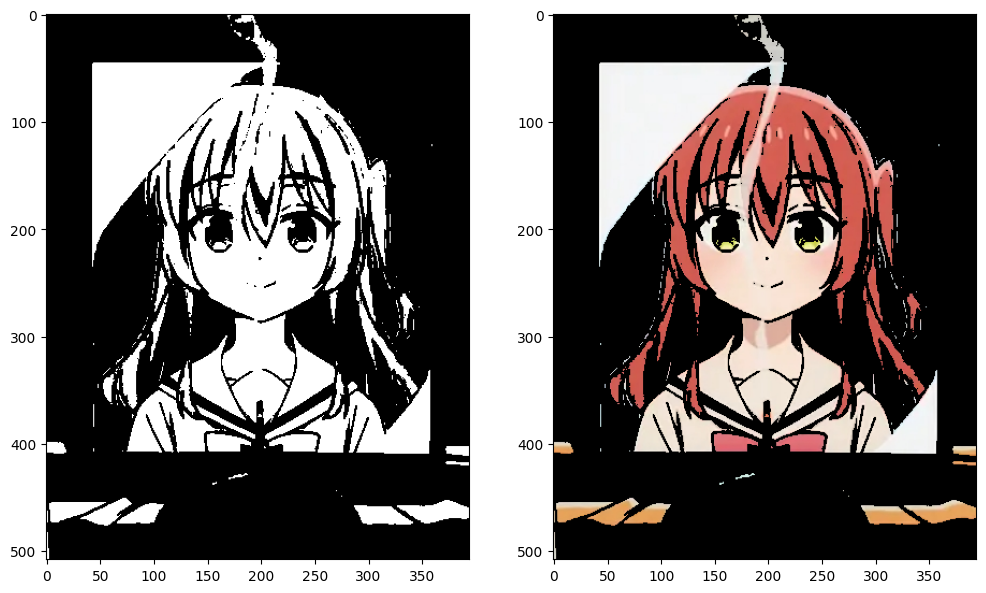

In [13]:
img = cv2.imread('res/kita.png')
show_img(img)
img_b, img_g, img_r = cv2.split(img)
#红的保留
#不够红的就滤掉
thr, img_bin = cv2.threshold(img_r, 200, 255, cv2.THRESH_BINARY)
img[img_bin == 0] = 0
show_img(img_bin, img)

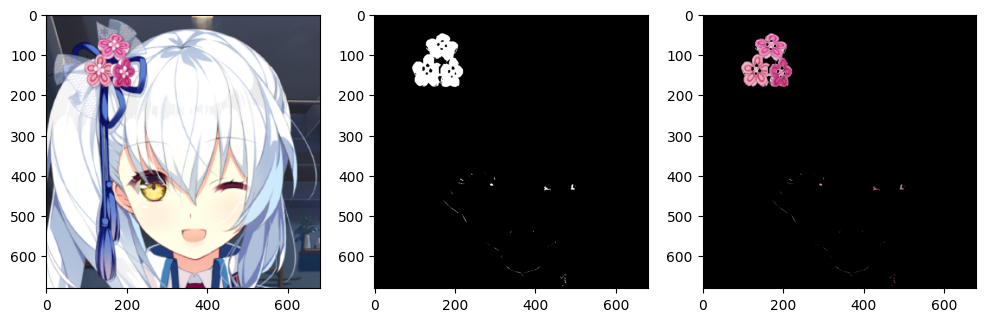

In [14]:
red_l = np.array([220, 30, 150])
red_u = np.array([250, 255, 255])
r_mask = cv2.inRange(tsubaki_hsv, red_l, red_u)
hana = tsubaki.copy()
hana[r_mask == 0] = 0
show_img(tsubaki, r_mask, hana)

## $$Exercise$$

下图为去年R2在赛场上，捡球识别相机机拍下来的一帧照片。请你选择合适的颜色空间与阈值，将图中蓝球部分割出来

要求：蓝球的主体部分保留，色差较大处可以丢弃；护城河部分必须筛掉，远处的浅蓝色干扰尽量筛掉，队员的马甲与水稻不做要求。

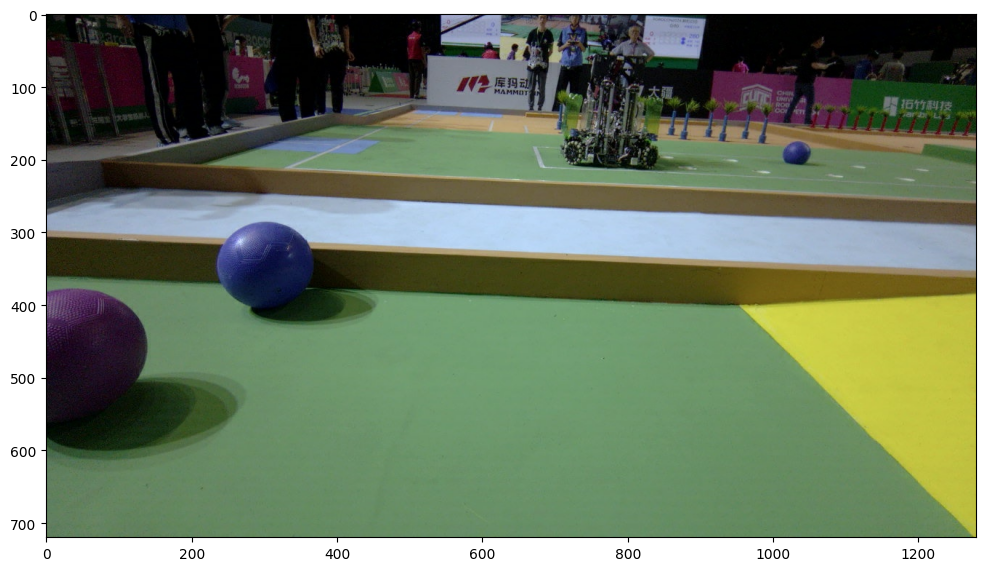

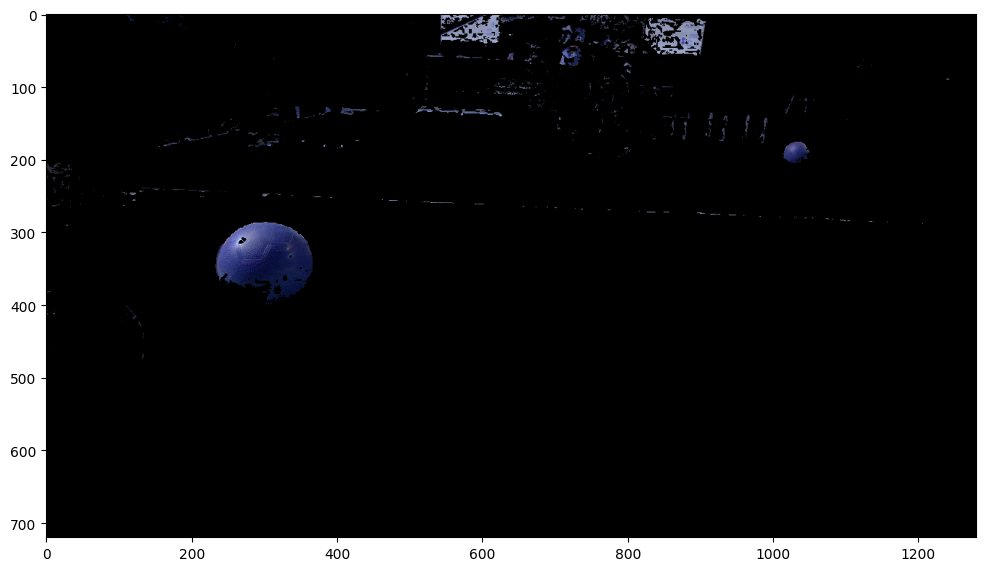

In [15]:
img = cv2.imread('res/ex1.jpg')
show_img(img)
blue_l = np.array([160, 50, 50])
blue_u = np.array([192, 255, 255])
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV_FULL)
b_mask = cv2.inRange(img_hsv, blue_l, blue_u)
ball = img.copy()
ball[b_mask == 0] = 0
show_img(ball)

## 4. 图像滤波与去噪

在实际拍摄和处理图像时，难免会遇到各种噪声，比如亮点、黑点、杂色等。滤波就是用来去除这些噪声，让图像更清晰。下面我们介绍三种常用的滤波方法：均值滤波、高斯滤波和双边滤波。

在实际的图像处理中，我们常用的滤波方法有均值滤波、高斯滤波和双边滤波。下面我们用更通俗的语言来介绍它们的原理和效果：

- **均值滤波**：就是用周围像素的平均值来替换当前像素，能去掉一些杂点，但图像会变模糊。
- **高斯滤波**：和均值滤波类似，但更聪明，离中心越近的像素影响越大，能更好地保留细节。
- **双边滤波**：不仅考虑距离，还考虑颜色相似度。只有和中心像素颜色接近的才会被平均，能在去噪的同时保留边缘。

这些方法各有优缺点，实际用的时候可以根据需求选择。
![滤波示意图](res/biFilter.png)

### 4.1 均值滤波（Mean Filter）

均值滤波是一种最基础的图像去噪方法。它的原理是用一个窗口（比如3x3或5x5）覆盖图像，每个像素都用窗口内所有像素的平均值来替换。这样可以有效去除图像中的随机噪声，但也会让图像变得模糊，细节丢失。

均值滤波适合用来处理轻微的噪声，但不适合对边缘要求很高的场景。

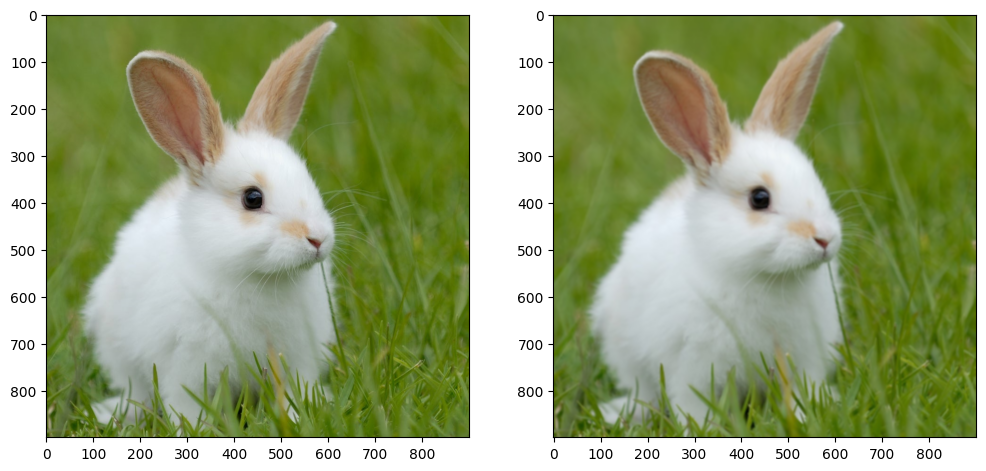

In [16]:
img = cv2.imread('res/rabbit.jpg')
img_mean = cv2.blur(img, (5, 5))
show_img(img, img_mean)

### 4.2 高斯滤波（Gaussian Filter）

均值滤波本身存在着固有的缺陷，即它不能很好地保护图像细节，在图像去噪的同时也破坏了图像的细节，从而使图像变得模糊，不能很好地去除噪声点，特别是椒盐噪声（随机出现的黑点和白点）。

为了解决均值滤波的问题，我们希望距离中间近的像素权重大些，距离中间远的像素权重小些。为此，我们引入了高斯滤波，它的核中的元素，是通过高斯分布的概率密度函数（钟形曲线）计算而来的。

In [17]:
img = cv2.imread('res/rabbit.jpg')
# 为了更好地展示滤波的效果，我们使用更小的图片
img = img[150:550, 250:650]

In [18]:
# OpenCV中，可以通过`cv2.getGaussianKernel`函数获取单轴的高斯核
kernel_gauss = cv2.getGaussianKernel(5, sigma=1)
print(kernel_gauss)

[[0.05448868]
 [0.24420134]
 [0.40261995]
 [0.24420134]
 [0.05448868]]


[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


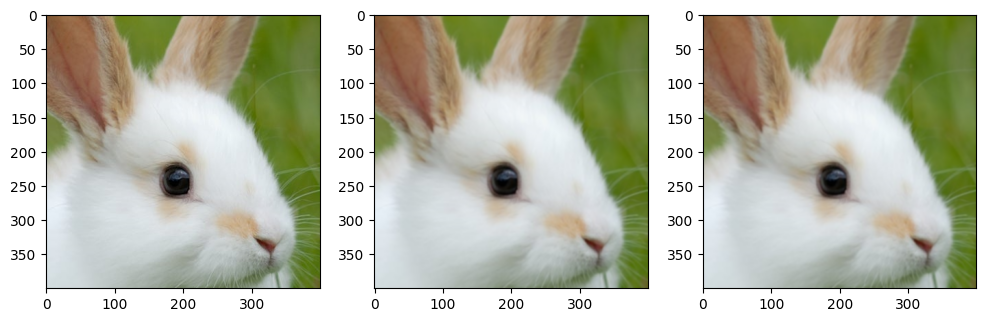

In [19]:
# `	cv.GaussianBlur`可以实现高斯滤波
img_gauss1 = cv2.GaussianBlur(img, (11, 11), 1)
matrix_kernel = kernel_gauss.dot(kernel_gauss.T)
print(matrix_kernel)
img_gauss2 = cv2.GaussianBlur(img, (5, 5), 1)
show_img(img, img_gauss1, img_gauss2)

### 4.3 双边滤波（Bilateral Filter）

双边滤波是一种更高级的去噪方法。它不仅考虑像素之间的距离，还考虑像素颜色的相似度。只有和中心像素颜色接近的像素才会被平均，这样可以在去除噪声的同时，最大程度地保留图像的边缘和细节。

双边滤波处理后的图像看起来像水彩画，边缘清晰但噪声减少，适合用在需要保留边缘的场景。

虽然效果好，但计算量比前两种方法大一些，处理速度会慢一点。

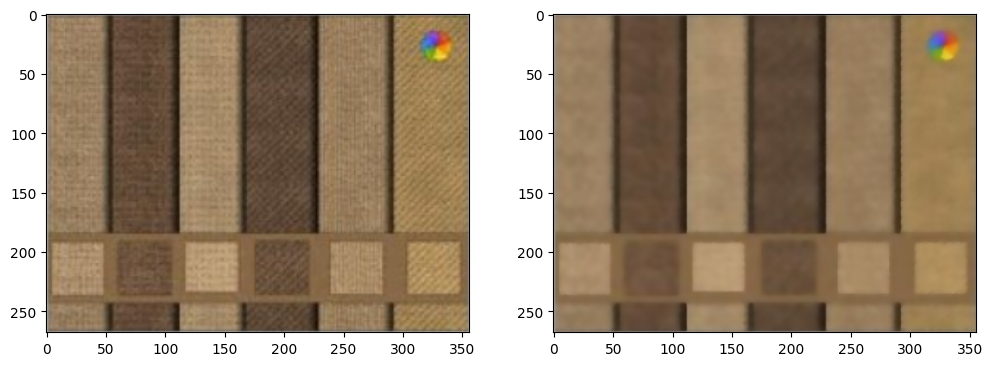

In [20]:
img2 = cv2.imread("res/test_bi.png")
img2_bi = cv2.bilateralFilter(img2, 9, 75, 75)
show_img(img2, img2_bi)

## 5. ROI

ROI即Range of Interest，指代我们在图片中需要对其处理的（感兴趣的）区域。选取合适的ROI区域能够简单快捷的避免误判，大大降低后续处理的难度。

在python中，我们一般通过切片得到ROI。

选取ROI时，注意图像的原点在图片左上角，第一个维度为row，从上往下为正方向；第二个维度为column，从左往右为正方向。

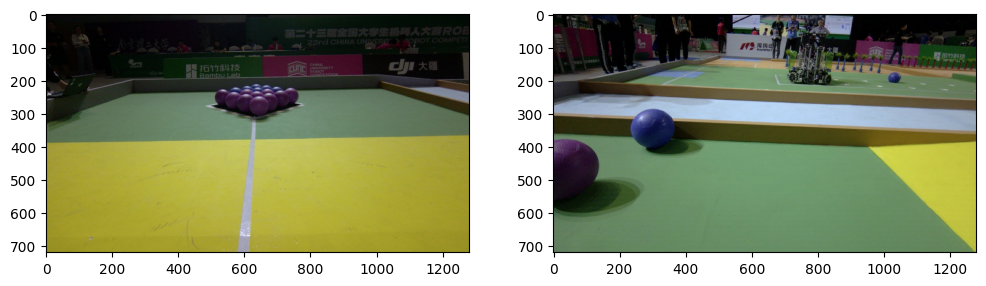

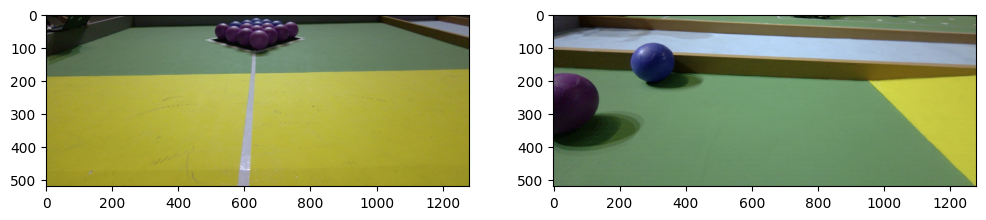

In [21]:
img_far = cv2.imread('res/far.jpg')
img_ex = cv2.imread('res/ex1.jpg')
show_img(img_far, img_ex)
show_img(img_far[200: , :, :], img_ex[200: , :, :])

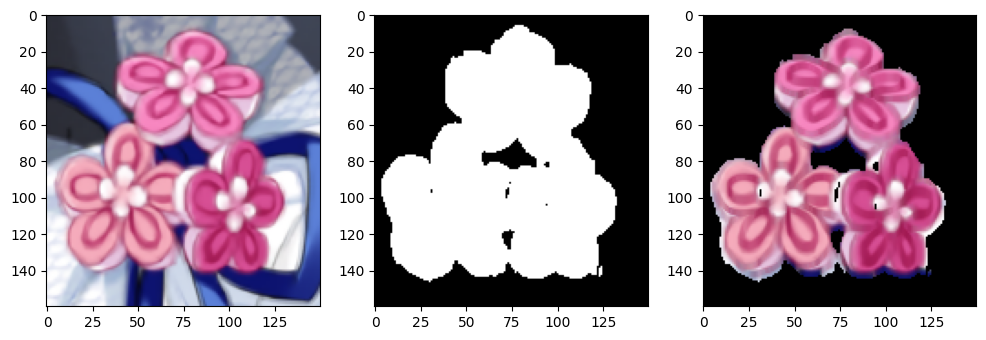

In [22]:
roi = tsubaki[40: 200, 90: 240, :]
roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV_FULL)

red_l = np.array([190, 5, 150])
red_u = np.array([255, 255, 255])
r_mask = cv2.inRange(roi_hsv, red_l, red_u)
r_mask = cv2.dilate(r_mask, (5, 5), iterations=4)
hana = roi.copy()
hana[r_mask == 0] = 0
hana = cv2.erode(hana, (2, 2), iterations=2)
show_img(roi, r_mask, hana)

## 6 面向对象编程（OOP）入门教程

下面我将通过多个代码块，一步一步带你理解面向对象编程的核心概念。

### 6.1 为什么需要面向对象编程？

首先，让我们看看没有OOP时，代码是什么样子的：

In [23]:
# 传统写法：散装数据管理参与者
# 明明同样拥有姓名、回响能力和「道」数量等属性，却需要一个一个声明
participant1_name = "齐夏"
participant1_skill = "生生不息"
participant1_dao = 0

participant2_name = "乔家劲"
participant2_skill = "破万法"
participant2_dao = 0

def activate_skill(name, skill, dao):
    print(f"{name}在游戏中觉醒了{skill}，当前拥有{dao}颗「道」")

activate_skill(participant1_name, participant1_skill, participant1_dao)

齐夏在游戏中觉醒了生生不息，当前拥有0颗「道」


**问题分析：**
- 数据分散，难以管理
- 容易传递错误的数据
- 添加新属性时需要修改很多地方

### 6.2 类与对象：OOP的基础

#### 6.2.1 什么是类和对象？

**类**：是蓝图、模板（比如"参与者"这个概念）

**对象**：是根据蓝图创建的具体实例（比如"齐夏"这个具体的参与者）

In [24]:
class Participant:
    """参与者类，代表终焉之地的一个玩家"""

    # __init__是什么？
    # __init__是一个特殊方法，用于初始化对象的属性等。
    def __init__(self, name, Echo, dao=0):
        # 类的属性定义
        # 方法和属性——也叫成员函数和成员变量——是类的核心组成部分
        self.name = name      # 姓名（如齐夏）
        self.Echo = Echo    # 回响能力（如破万法、天行健）
        self.dao = dao        # 拥有的「道」数量
        self.is_alive = True  # 生存状态
    
    # 方法定义
    def activate_skill(self, game_name):
        """参与游戏的方法"""
        print(f"{self.name}在「{game_name}」游戏中觉醒了{self.Echo}")
    
    def earn_dao(self, amount):
        """获得「道」的方法"""
        self.dao += amount
        print(f"{self.name}获得{amount}颗「道」，当前总计：{self.dao}颗")
    
    def die(self):
        """死亡方法（但会复活）"""
        self.is_alive = False
        print(f"{self.name}在游戏中死亡...但将在第十一日复活")

# 创建参与者对象——也叫实例化
qi_xia = Participant("齐夏", "生生不息", 0)
qiao_jiajin = Participant("乔家劲", "破万法", 0)

# 使用对象方法
print("=== 参与者入场 ===")
qi_xia.activate_skill("说谎者游戏")
qiao_jiajin.activate_skill("力量竞技场")

qi_xia.earn_dao(3)
qiao_jiajin.earn_dao(2)

print("\n=== 游戏结果 ===")
qi_xia.die()

=== 参与者入场 ===
齐夏在「说谎者游戏」游戏中觉醒了生生不息
乔家劲在「力量竞技场」游戏中觉醒了破万法
齐夏获得3颗「道」，当前总计：3颗
乔家劲获得2颗「道」，当前总计：2颗

=== 游戏结果 ===
齐夏在游戏中死亡...但将在第十一日复活


### 6.3 封装：保护数据安全

封装意味着将数据和对数据的操作包装在一起，并控制对数据的访问。

In [25]:
class EchoAbility:
    """回响能力基类 - 封装回响能力名称，只暴露效果"""
    
    def __init__(self, name, effect, eye_position):
        # 成员变量
        # 有__的成员变量是私有的，不能被外部访问
        # 没有__的成员变量是公开的，可以被外部访问
        self.effect = effect        # 能力效果（公开）
        self.__eye_position = eye_position  # 眼睛位置（核心机密）
        self.__name = name          # 回响能力名称（私有，如"夺心魄"）
    
    # 成员函数：执行代码块
    def ability_effect(self):
        return f"能力效果：{self.effect}"

# 测试基础封装
print("=== 回响能力基础封装 ===")
duoxingpo = EchoAbility("夺心魄", "精神控制，强迫他人模仿自己的动作", "心脏")
print(duoxingpo.ability_effect())  # 只能看到效果

# 尝试访问私有属性会失败
"""
try是什么？
try-except语句用于捕获和处理异常。
在try块中放置可能引发异常的代码，如果发生异常，程序不会崩溃，而是跳转到except块中执行相应的处理代码。
"""
try:
    print(duoxingpo.__name)  # 访问私有属性会失败
except Exception as e:
    print(f"机密保护：{e}")

=== 回响能力基础封装 ===
能力效果：精神控制，强迫他人模仿自己的动作
机密保护：'EchoAbility' object has no attribute '__name'


# $$Homework$$

在经历了一年的奋斗与十几天昼夜不休的调车后,你学长的学长终于随队来到了江阴理工,站在了2023 Robocon的赛场上.

然而,赛场上和吃了全白闪一样的聚光灯直射场地,对各支战队的视觉组提出了极大的考验,许多队伍的识别模型当场爆炸要连夜重练.

现在,轮到RobotIC战队进行试运行了.作为算法组中负责写R2球识别的你,留给你测试的时间,只有16分钟.

你能在这16分钟内收集足够的数据,将R2内部球识别的算法调好吗？

![R2球识别测试现场](res/oops.jpg)



### 具体要求

在res文件夹下有两个视频output.avi与output1.avi,请依次读取视频中每一帧的画面,给出当前R2内部球准确的状态(无球、紫球、红球、蓝球),并用合适的方法展示结果(例如,用文字显示在视频画面中).

同时,为了方便与其他上位机算法系统进行对接,我们需要对这个算法进行封装.

**提交时,将你们的代码命名为`solu.py`放在根目录下的`Homework`文件夹内**

读取的文件名称无需动态修改,但是请务必在你提交的程序中使用相对路径!

### 评分标准

#### 基础功能(70 %)

1. 读取res文件夹下的视频output.avi与output1.avi **(10 %)**
2. 读取视频中每一帧画面,给出当前R2内部球准确的状态(无球、紫球、红球、蓝球) **(50 %)**
3. 用合适的方法展示结果 **(10 %)**

**Hint：** 好好回想本节课的教学内容：选取什么样的颜色空间比较合适？选取哪里作为ROI？怎么调整我的阈值？怎么对多种情况进行判断？如果有易混淆的情况需要特判该怎么办？下面会给出一些你可能要用到的代码示例：


In [ ]:
# 从output.avi中逐帧读取并将当前帧存为frame
cam = cv2.VideoCapture(r"res\output.avi")
cnt = 0
while True:
    ret, frame = cam.read()
    frame = cv2.rotate(frame, cv2.ROTATE_180)
    if not ret:
        break

    # 展示当前帧
    cv2.imshow('frame', frame)
    cv2.waitKey(25)

    # 在while循环中进行你对frame的处理

cam.release()


In [ ]:
# 找到像素数量最多的颜色
color_counts = {'红色': red_pixel_count, '蓝色': blue_pixel_count, '紫色': purple_pixel_count}
dominant_color = max(color_counts, key=color_counts.get)

#### 面向对象设计(30 %)

实现以下两个类

##### **ColorRange 类 (10 %)**

管理不同颜色的HSV阈值范围
包括但不限于以下方法：

1. 构造函数
2. 提供添加颜色范围的方法
3. 提供生成颜色掩膜的方法
4. 实现多个颜色的组合掩膜(如红色的两个范围)

##### **BallDetector 主类 (20 %)**

整合视频读取和球检测逻辑
包括但不限于以下方法：

1. 构造函数
2. 对单帧进行处理
3. 对整个视频处理
4. 设置ROI区域

最后你的程序结构类似于:


In [ ]:
import ...

class ColorRange:...

class BallDetector:...

def main():...

if __name__ == "__main__":
    main()


这一部分可能对新手而言有些难以理解。
然而理解面向对象的相关概念有助于你更加顺利地进行后续的学习。

#### **Config 读取 (额外 5%)**

在实际使用中,修改程序代码,尤其是C++代码,之后,需要重新编译,修改才能生效.
为了快速进行调试,我们需要新建一个配置文件,将我们调试的数据进行存储.运行时,程序会读取其中的参数.

1. 在根目录下的`Homework`文件夹内创建`config.json`文件,其中包括但不限于以下内容：
   - 颜色范围
   - ROI

2. 在`ColorRange`和`BallDetector`类中使用配置文件中的参数.

我们会根据总体完成情况决定部分分怎么给,所以大家不用特别担心,万一最后全靠同行抬举呢.


In [ ]:
# 关于为什么我不建议大家作业拿jupyter notebook来写，运行一下就知道了（）

# 从output.avi中逐帧读取并将当前帧存为frame
cam = cv2.VideoCapture(r"res/output.avi")
cnt = 0
while True:
    
    ret, frame = cam.read()
    
    frame = cv2.rotate(frame, cv2.ROTATE_180)
    if not ret:
        break
    #"""
    current = cam.get(cv2.CAP_PROP_POS_FRAMES)
    print(f"current frame = {current}")
    clear_output(wait=True)
    # 展示当前帧
    cv2.imshow('frame', frame)
    cv2.waitKey(25)
    #"""
    # 在while循环中进行你对frame的处理

cam.release()